SEC Filings + COVID-19 Analytics Julie Zhang


### Import the appropriate library you need to solve the questions.

In [2]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random

### Please assign the variables `first_name`, `last_name`, `student_id`, and `email` with your first name, last name, student ID, and email address.

In [4]:
first_name = str("Julie")
last_name = str("Zhang")
student_id = int("000000")
email = str("juliezyw@gmail.com")

## [SEC analytics : Question 1 - 13]

##### Question 1: Find the number of characters in this file and assign it to the `ans1` variable.
- Download `feed_header_2017-2019.tsv` file into the same directory, where `hw1_starter.ipynb` is located. (If not, there will be an extra deduction on your grade)
- Open `feed_header_2017-2019.tsv` file with `read-only` file mode.
- Please use `open` function to open this `TSV` file.
- `TSV` file is similar to `CSV`, but its value is separated by `Tab`.

[Hint]
- `open` function : https://www.w3schools.com/python/ref_func_open.asp

In [4]:
with open("feed_header_2017-2019.tsv", "r") as infile:
    text = infile.read()
ans1 = int(len(text))
print(ans1)

316388908


##### Question 2: Find the number of words in the file and assign it to the `ans2` variable.
- We consider <b>word</b> as all numbers, special characters, and text separated by white space.

In [187]:
ans2 = int(len(text.split()))
print(ans2)

26223290


##### Question 3: Find the number of lines in the file and assign it to the `ans3` variable.

In [188]:
with open("feed_header_2017-2019.tsv", "r") as infile:
    lines = infile.readlines()
ans3 = int(len(lines))
print(ans3)

1765125


### From now on, you will decide which industry area you will analyze for investigating the trend of that industry. 
### To do so, you will select the first digit `SIC` code.

##### Question 4: Divide the `student_id` by 8, and add 1 to the `remainder`. Assign its value to the `ans4` variable.


In [6]:
ans4= int((student_id % 8) + 1)
print(ans4)

7


### Now, you have the first digit of `SIC` that you will analyze.
### Please extract the rows of the following condition. 
- Read the `tsv` using `pandas` function. 
- Save the dataframe name as `df`.
- We need rows with an `ASSIGNED-SIC` column value starting with the value of `ans4`.      
- You can extract this condition using various methods such as  `for-loop`, `pandas`, and `numpy`.


##### Question 5: Find the shape of `df` and assign it to the `ans5` variable.

In [13]:
df = pd.read_csv('feed_header_2017-2019.tsv', sep='\t')
df = df[np.logical_and(df['ASSIGNED-SIC']>=1000*ans4, df['ASSIGNED-SIC']<1000*(ans4+1))]
ans5 = df.shape
print(ans5)
df.head()

(1765124, 12)
(143798, 12)


,id,ARCHIVE-PATH,FILING-DATE,CIK,CONFORMED-NAME,TYPE,FORM-TYPE,ASSIGNED-SIC,CITY,STATE,ZIP,ACCESSION-NUMBER
17,13019906,/var/opt/edgar/data/Feed/2019/QTR3/20190827.nc...,2019-08-27,1467623,"DROPBOX, INC.",3,3,7372.0,SAN FRANCISCO,CA,94158,0001562180-19-004510
60,13019655,/var/opt/edgar/data/Feed/2019/QTR3/20190827.nc...,2019-08-27,1701040,CISION LTD.,4,4,7372.0,CHICAGO,IL,60601,0001144204-19-041898
75,13019401,/var/opt/edgar/data/Feed/2019/QTR3/20190827.nc...,2019-08-27,1635282,"Rimini Street, Inc.",4,4,7389.0,LAS VEGAS,NV,89169,0001638599-19-000815
76,13019913,/var/opt/edgar/data/Feed/2019/QTR3/20190827.nc...,2019-08-27,1701040,CISION LTD.,4,4,7372.0,CHICAGO,IL,60601,0001144204-19-041895
94,13020427,/var/opt/edgar/data/Feed/2019/QTR3/20190827.nc...,2019-08-27,1297989,"ExlService Holdings, Inc.",8-K,8-K,7389.0,NEW YORK,X1,10022,0001144204-19-041831


### From questions 6 to 8, you will analyze the feature of the company name.
### To solve questions 6 ~ 8, you need to use the `CONFORMED-NAME` column value from the dataframe `df`.

##### Question 6: Find the most common `word` among company names and assign it to the `ans6`.

- We consider <b>word</b> as all numbers, special characters, and text separated by white space.
- You will get the <b>word</b> using the `split` method.
- For Question 6, each <b>word</b> is case-sensitive.

[Hint]

- `split` method : https://www.w3schools.com/python/ref_string_split.asp

In [191]:
comp_name = [comp for comp in df['CONFORMED-NAME']]
comp_list = []
for comp in comp_name:
    comp_new = comp.split()
    for com in comp_new: 
        comp_list.append(com)     

ans6 = Counter(comp_list).most_common(1)[0][0]
print(ans6)

Inc.


### What was the answer to `ans6`? 
### Do you think the answer is a `stopword`? 
### `Stopwords` are generally the most common words in a language and may not be meaningful such as `the`, `a`, `of` and `or`.
### In the industry section, the following words can be stopwords (`inc`, `co`, `se`, `ltd`, ... ).
### Therefore, you want to delete the `stopwords` to get the most precise result.

##### Question 7: Find the most common word among company names after removing stopwords and assign it to the `ans7`.
- Please <b>lowercase</b> the company name value.
- We consider <b>word</b> as all numbers, special characters, and text separated by white space.
- Filter the word if the word includes any items among the provided `stopwords` list.

In [192]:
stopwords = ['inc','corp','co','ltd','de','llc','group','inc.']

comp_name = [comp for comp in df['CONFORMED-NAME']]
comp_list = []
for comp in comp_name:
    comp_new = comp.lower().split()
    for com in comp_new: 
        if com not in stopwords:
            comp_list.append(com)

ans7 = Counter(comp_list).most_common(1)[0][0]
print(ans7)

international


##### Question 8: Find the longest company name and assign it to the `ans8`.

- You do not need to split the value to extract the company name. 
- Here are company name examples : `Apple, inc.`, `Amazon, inc.`

In [193]:
comp_name = [comp for comp in df['CONFORMED-NAME']]
comp_dict = {}
for comp in comp_name:
    comp_dict[comp]=len(comp)
    
ans8 = max(comp_dict, key=comp_dict.get)    
print(ans8)

Wellington Trust Company, National Association Multiple Common Trust Funds Trust, Micro Cap Equity P


### Question 9 ~ 12: You want to see the trend of  `STATE` where the companies submit the `10-K` report in `2018` or `2019` from the `df` dataframe.
- The first step is to make the new column, `year`, which includes the year value from `FILING-DATE` column.
- Please convert the `year` column datatype as `int`.
- Next, filter the dataframe which <b>1)</b> `Form-Type` is `10-K` and <b>2)</b> `Year` is `2018` or `2019` and assign the filtered result as the
`df_10K`.

##### Question 9: Please find the unique number of states from the dataframe `df_10K` and assign it to the `ans9`.
[Hint]
- `.nunique()` method:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [218]:
df['year'] = df['FILING-DATE'].str[0:4].astype(int)
df_10K = df[df["FORM-TYPE"] == "10-K"] 
df_10K = df_10K[(df_10K["year"] == 2018) | (df_10K["year"] == 2019)]
ans9 = df_10K["STATE"].nunique()
print(ans9)

75


### You are provided `states` information in `us_states.csv`.
### If comparing `states` list from  `df_10K`  with `us_states.csv`, you will notice that some state names are invalid. 
### Therefore, you need to preprocess the `State` value in `df_10K` dataframe. 
### Download `us_state.csv` file into the same directory, where `hw1_starter.ipynb` is located. (If not, there will be an extra deduction on your grade)
### Read the `us_states.csv` file and remove rows with invalid states from `df_10K` dataframe.

##### Question 10: Please find the unique number of valid states from the dataframe `df_10K_state` and assign its value to the `ans10`.
- Use the `pandas` library to open the `us_states.csv` file as a dataframe `usa_states`.
- Get rid of rows which `STATE` column value is not the same as `State` column value from dataframe `usa_states`.
- Save the preprocessed dataframe name as `df_10K_state`.

In [221]:
usa_states = pd.read_csv("us_states.csv")["State"].values
df_10K_state = df_10K[df_10K["STATE"].isin(usa_states)]
ans10 = df_10K_state["STATE"].nunique()
print(ans10)

44


#### Question 11: Find the states with the largest number of 10-K reports from dataframe `df_10K_state`, and assign this number to `ans11`.

[Hint]
- To solve this question, you can refer the `Counter` object to check how many 10-K reporting is submitted by companies in each region.
- `Counter` : https://docs.python.org/3/library/collections.html


In [222]:
ans11 = Counter(df_10K_state["STATE"]).most_common(1)[0][1]
print(ans11)

315


##### Question 12: Find the number of `10-K` reports from the state of `NY` from the  `df_10K_state` dataframe.

In [223]:
ans12 = len(df_10K_state[df_10K_state['STATE']=="NY"])
print(ans12)

166


##### Question 13: Make the `bar` graph based on the following instructions.
- You want to know the top <b>7</b> states where the `10-K` reports were most reported.
- To make a <b>bar</b> graph, please use the `df_10K_state` dataframe.
- Before drawing the graph, make the `state_count` dictionary which contains the state and the number of 10-K reports for that state.<br/>
  (e.g.) <b>{'NY': 166, 'CA':  ... }</b>
- Set all labels' font size as font size <b>15</b>. 
- Set the xlabel as "`STATE`" (please use `STATE` column).
- Set the ylabel as "`Number of 10-K reports`" (please use `state_count` dictionary).
- Set the title as "`Number of 10-K reports in 2018 and 2019`".
- Save the graph named "`hw1_ans13_(student_id).png`".<br/>
  (e.g.) <b>hw1_ans13_37510930.png</b>

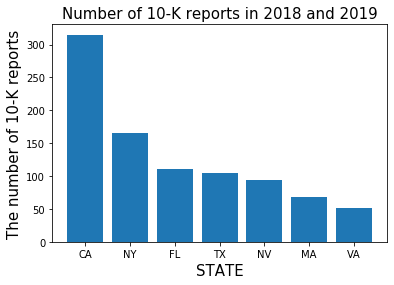

In [224]:
list_states = df_10K_state['STATE'].values
state_count = {}
for state in list_states:
    if state in state_count:
        state_count[state] += 1
    else:
        state_count[state] = 1
big_states = sorted(state_count, key=state_count.get, reverse=True)[0:7]
big_values = [state_count[s] for s in big_states]

plt.bar(big_states, big_values)
plt.xlabel('STATE', fontsize=15)
plt.ylabel('The number of 10-K reports', fontsize=15)
plt.title('Number of 10-K reports in 2018 and 2019', fontsize=15)
plt.savefig('hw1_ans13_{}.png'.format(student_id))
plt.show()

## [COVID-19 analytics : Question 14 - 19]

### You want to calculate basic data statistics and draw graphs on `COVID-19 Cases`, which contain the information on `Reported_Date`, `HA`, `Sex`, and `Age_Group` from the `covid` dataframe.

- Download `BCCDC_COVID19_Dashboard_Case_Details.csv` file into the same directory, where `hw1_starter.ipynb` is located. (If not, there will be an extra deduction on your grade)
- Open `BCCDC_COVID19_Dashboard_Case_Details.csv` file using `pandas` library and assign the dataframe name as `covid`.

##### Question 14: Find how many COVID-19 cases occurred in October and assign its value to `ans14`. 

- The first step is to make the new column, `Month`, which includes month value from `Reported_Date` column.
- Next, make the `list_Month` which contains the value of `Month` in `covid` dataframe.
- Then, make the `month_count` dictionary which contains the month and the number of cases for that month.<br/>
  (e.g.) <b>{'01': 1, '02': 8, ... }</b>
- Finally, get the number of cases occured in October

In [14]:
covid = pd.read_csv('BCCDC_COVID19_Dashboard_Case_Details.csv')
covid['Month']=covid['Reported_Date'].str[5:7]

list_Month = covid['Month'].values
month_count = {}

for month in list_Month:
    if month in month_count:
        month_count[month] += 1
    else:
        month_count[month] = 1

ans14 = month_count.get('10')

print(ans14)

3292


##### Question 15: Make the `bar` chart based on the following instructions.
- You want to draw the `bar` chart to find out the trend in covid-19 by month based on the `list_Month` and `month_count`in Question 14.
- X axis is the month in `list_Month` and Y axis is the number of cases in `month_count`.
- Set all labels' font size as <b>15</b>. 
- Set the xlabel as "`Months`".
- Set the ylabel as "`The Number of Cases`".
- Set the title as "`The Number of Cases by Months`".
- Save the graph named "`hw1_ans15_(student_id).png`".<br/>
  (e.g.) <b>hw1_ans15_37510930.png</b>

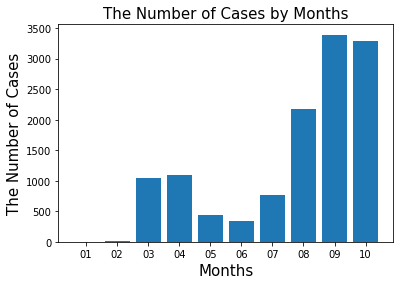

In [15]:
month_values = [month_count[s] for s in list_Month]

plt.bar(list_Month, month_values)
plt.xlabel('Months', fontsize=15)
plt.ylabel('The Number of Cases', fontsize=15)
plt.title('The Number of Cases by Months', fontsize=15)
plt.savefig('hw1_ans15_{}.png'.format(student_id))
plt.show()

### Question 16~17: Make the `Line` plot by `Sex` and `Month`.
- We want to divide the number of cases by `Sex` in `question 15`.

##### Question 16: Find the month in which the number of female(`F`) cases were least and assign it to `ans16`. 
- Column `Sex` consists of `M`,`F`,and `U`.
- Calculate the number of cases in each `Sex` by `Month` as in Question `14`.

- The first step is to divide `covid` dataframe into three sub-dataframe according to `Sex` values.
- Next, make the `Male_Month`, `Female_Month`, and `Unknown_Month` which contains the value of `Month` in three sub-dataframe.
- Then, make the `Male_count`, `Female_count`, and `Unknown_count` dictionary which contains the month and the number of cases for that month.<br/>
  (e.g.) <b>{'01': 1, '02': 8, ... } for each `Sex`</b>
- Finally, get the month in which the number of female(`F`) cases were least.

In [16]:
covid_Male = covid[covid['Sex']=='M']
covid_Female = covid[covid['Sex']=='F']
covid_Unknown = covid[covid['Sex']=='U']

Male_Month = covid_Male['Month'].values
Female_Month = covid_Female['Month'].values
Unknown_Month = covid_Unknown['Month'].values

Male_count = {}
Female_count = {}
Unknown_count = {}
for month in Male_Month:
    if month in Male_count:
        Male_count[month] += 1
    else:
        Male_count[month] = 1

for month in Female_Month:
    if month in Female_count:
        Female_count[month] += 1
    else:
        Female_count[month] = 1

for month in Unknown_Month:
    if month in Unknown_count:
        Unknown_count[month] += 1
    else:
        Unknown_count[month] = 1

ans16 = min(Female_count, key=Female_count.get)    
print(ans16)

02


##### Question 17: Make the `line` plot based on the following instructions.
- You want to distinguish the number of cases by `Month` between `Sex` to check whether there is different trend between `Sex`.
- Draw the `plot` based on the `Male_Month`,`Female_Month`,`Unknown_Month`,`Male_count`,`Female_count`, and `Unknown_count`in Question 16.
- Set all labels' font size as <b>15</b>. 
- Set the xlabel as "`Months`" (please use `month_count` column values).
- Set the ylabel as "`The Number of Cases by Sex`".
- Set the title as "`The Number of Cases by Sex and Months`".
- Save the graph named "`hw1_ans17_(student_id).png`".<br/>
  (e.g.) <b>hw1_ans17_37510930.png</b>

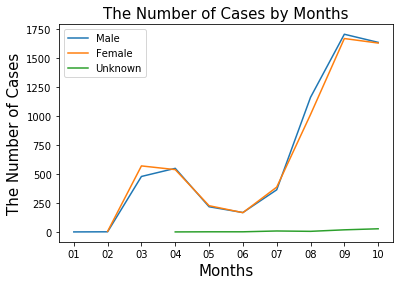

In [17]:
Male_values = [Male_count[s] for s in Male_Month]
Female_values = [Female_count[s] for s in Female_Month]
Unknown_values = [Unknown_count[s] for s in Unknown_Month]

plt.plot(Male_Month, Male_values)
plt.plot(Female_Month, Female_values)
plt.plot(Unknown_Month, Unknown_values)
plt.xlabel('Months', fontsize=15)
plt.ylabel('The Number of Cases', fontsize=15)
plt.title('The Number of Cases by Months', fontsize=15)
plt.legend(['Male','Female','Unknown'])
plt.savefig('hw1_ans17_{}.png'.format(student_id))
plt.show()

### Question 18~19: Make the `Horizontal bar` plot.

- B.C. began to be affected by the covid-19 after mid-March.
- Accordingly, we would like to check how many cases were reported by regions in specific month in <b>Question 18</b>.
- Also, we would like to check the cumulative reported cases by regions in <b>Question 19</b>. 
- Select the code to aggregate `covid` dataframe by `HA` and `Month` and assign this dataframe as `covid_region`. 
- In the dataframe `covid_region`, the columns that you need are `HA`, `Month`, and `Classification_Reported`.
- Next, you need to make new column `Reported_cum`, which is the cumulative number of `Classification_Reported` of each `HA`.

[Hint]
- `groupby(sum)` : https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum
- `cumsum` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html
- `lamda` : https://www.w3schools.com/python/python_lambda.asp

In [18]:
covid_region = covid.groupby(['HA','Month']).count().reset_index()
covid_region = covid_region[['HA','Month','Classification_Reported']]
covid_region['Reported_cum'] = covid_region.groupby(['HA'])['Classification_Reported'].apply(lambda x: x.cumsum())
covid_region.head()

,HA,Month,Classification_Reported,Reported_cum
0,Fraser,02,2,2
1,Fraser,03,350,352
2,Fraser,04,617,969
3,Fraser,05,329,1298
4,Fraser,06,242,1540


##### Question 18: Draw the `Horizontal bar` graph when the `Month` is March(`03`).
- Set all labels' font size as <b>15</b>. 
- Set the xlabel as "`The Reported Number of Cases`"(Please use the value of `Classification_Reported`).
- Set the ylabel as "`Region`".
- Set the title as "`The Number of Cases in March`".
- Save the graph named "`hw1_ans18_(student_id).png`".<br/>
  (e.g.) <b>hw1_ans18_37510930.png</b>

[Hint]
- `barh` : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html

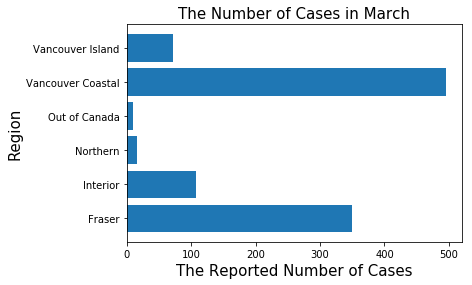

In [19]:
covid_march = (covid_region[covid_region['Month']=='03'])
plt.barh(covid_march['HA'], covid_march['Classification_Reported'])
plt.xlabel('The Reported Number of Cases', fontsize=15)
plt.ylabel('Region', fontsize=15)
plt.title('The Number of Cases in March', fontsize=15)
plt.savefig('hw1_ans18_{}.png'.format(student_id))
plt.show()

##### Question 19. Draw the `Horizontal bar` graph  until the `Month` is August(`08`).
- Aassign different random colors and sort the region in descending order (in the number of cumulative cases).
- Set all labels' font size as <b>15</b>. 
- Set the xlabel as "`The Reported Culumative Number of Cases`"(Please use the value of `Reported_cum`).
- Set the ylabel as "`Region`".
- Set the title as "`The Total Number of Cases Until August`".
- Save the graph named "`hw1_ans19_(student_id).png`".<br/>
  (e.g.) <b>hw1_ans19_37510930.png</b>

[Hint]
- `random` : https://docs.python.org/3/library/random.html
- `sort_values` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
- `map` : https://www.w3schools.com/python/ref_func_map.asp

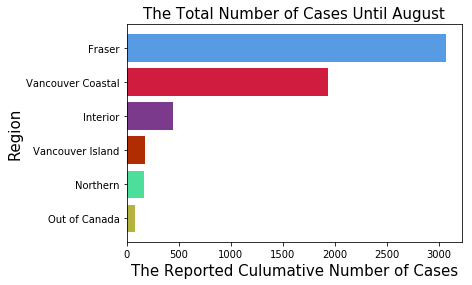

In [20]:
region_color = list(dict.fromkeys(covid_region['HA']))
color = np.random.rand(len(region_color),3)
colors = dict(zip(region_color,color))
covid_region['color']=covid_region['HA'].map(colors.get)
covid_aug = (covid_region[covid_region['Month']=='08']).sort_values(by='Reported_cum', ascending=True)
plt.barh(covid_aug['HA'], covid_aug['Reported_cum'], color=[colors[x] for x in covid_aug['HA']])
plt.xlabel('The Reported Culumative Number of Cases', fontsize=15)
plt.ylabel('Region', fontsize=15)
plt.title('The Total Number of Cases Until August', fontsize=15)
plt.savefig('hw1_ans19_{}.png'.format(student_id))
plt.show()